# Data Analysis with Time Series data

## Import the library

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Load the data

In [8]:
dataset_path = './data/opsd_germany_daily.csv'

opsd_daily = pd.read_csv(dataset_path, index_col=0, parse_dates=True)

## View the data

In [9]:
print(opsd_daily.shape)
print(opsd_daily.dtypes)
opsd_daily.head(3)

(4383, 4)
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [10]:
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

opsd_daily.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


## Time-based indexing

In [11]:
opsd_daily.loc[
    '2014-01-20':'2014-01-22'
]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [12]:
opsd_daily.loc[
    '2008'
]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-01-01,1083.424,NaN,NaN,NaN,2008,1,Tuesday
2008-01-02,1396.483,NaN,NaN,NaN,2008,1,Wednesday
2008-01-03,1523.427,NaN,NaN,NaN,2008,1,Thursday
2008-01-04,1512.429,NaN,NaN,NaN,2008,1,Friday
2008-01-05,1355.843,NaN,NaN,NaN,2008,1,Saturday
...,...,...,...,...,...,...,...
2008-12-27,1097.525,NaN,NaN,NaN,2008,12,Saturday
2008-12-28,1047.014,NaN,NaN,NaN,2008,12,Sunday
2008-12-29,1198.295,NaN,NaN,NaN,2008,12,Monday


## Visualizing time series data

<Axes: xlabel='Date'>

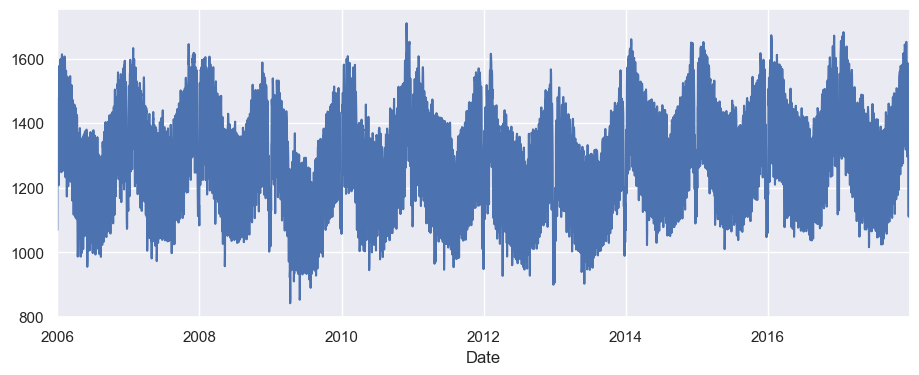

In [19]:
sns.set(rc={'figure.figsize':(11, 4)})
opsd_daily['Consumption'].plot()

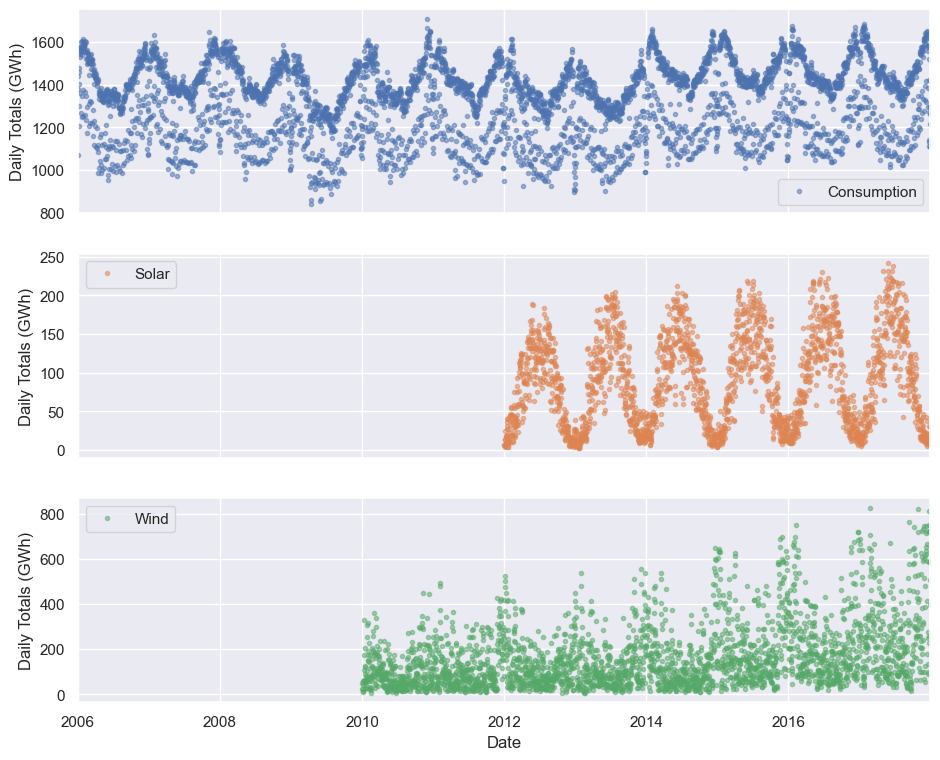

In [21]:
cols_plot = ["Consumption", "Solar", "Wind"]
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel("Daily Totals (GWh)")
plt.show()

## Seasonality

/var/folders/vr/3jx2w4xs6_5g7sg49dxnyn7w0000gn/T/ipykernel_84048/2923460985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax, palette=sns.color_palette("pastel"))
/var/folders/vr/3jx2w4xs6_5g7sg49dxnyn7w0000gn/T/ipykernel_84048/2923460985.py:4: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax, palette=sns.color_palette("pastel"))
/var/folders/vr/3jx2w4xs6_5g7sg49dxnyn7w0000gn/T/ipykernel_84048/2923460985.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax, palette=sns.co

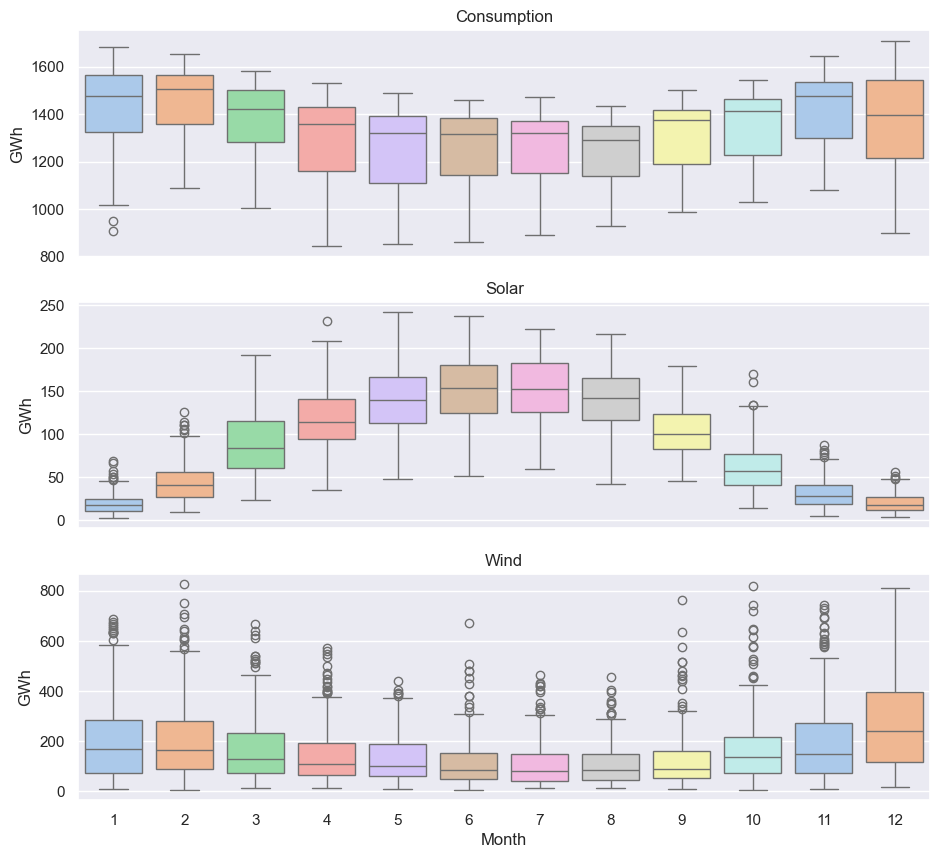

In [32]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)

for name, ax in zip(["Consumption", "Solar", "Wind"], axes):
    sns.boxplot(data=opsd_daily, x='Month', y=name, ax=ax, palette=sns.color_palette("pastel"))
    ax.set_ylabel("GWh")
    ax.set_title(name)
    
    if ax != axes[-1]:
        ax.set_xlabel('')

plt.show()

## Frequencies

In [38]:
# data_range create range of date time value
print(pd.date_range('1998-03-10', '1998-03-15', freq='D'))
print(pd.date_range('1998-03-10', '1998-05-15', freq='ME'))
print(pd.date_range('1994-03-10', '1998-05-15', freq='YE'))

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['1998-03-31', '1998-04-30'], dtype='datetime64[ns]', freq='ME')
DatetimeIndex(['1994-12-31', '1995-12-31', '1996-12-31', '1997-12-31'], dtype='datetime64[ns]', freq='YE-DEC')


In [39]:
time_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])

consumption_sample = opsd_daily.loc[time_sample, ['Consumption']].copy()
consumption_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [41]:
consumption_freq = consumption_sample.asfreq('D')

consumption_freq['Consumption - Forward Fill'] = consumption_sample.asfreq('D', method='ffill')
consumption_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## Resampling

In [44]:
data_columns = ['Consumption', "Wind", "Solar", "Wind+Solar"]

opsd_weekly_mean = opsd_daily[data_columns].resample("W").mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


In [45]:
print(opsd_daily.shape[0])
print(opsd_weekly_mean.shape[0])

4383
627


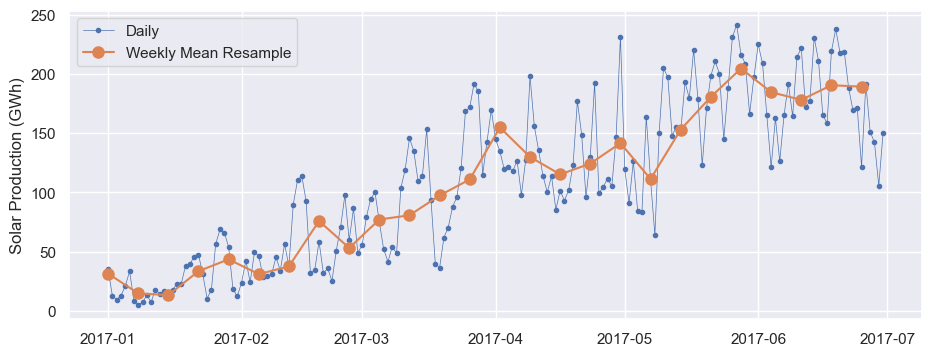

In [47]:
start, end = "2017-01", "2017-06"

fig, ax = plt.subplots()
ax.plot(opsd_daily.loc[start:end, "Solar"], marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, "Solar"], marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel("Solar Production (GWh)")
ax.legend()
plt.show()

In [48]:
opsd_annual = opsd_daily[data_columns].resample("YE").sum(min_count=360)

opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = "Year"

opsd_annual['Wind+Solar/Consumption'] =  opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2012'),
  Text(1, 0, '2013'),
  Text(2, 0, '2014'),
  Text(3, 0, '2015'),
  Text(4, 0, '2016'),
  Text(5, 0, '2017')])

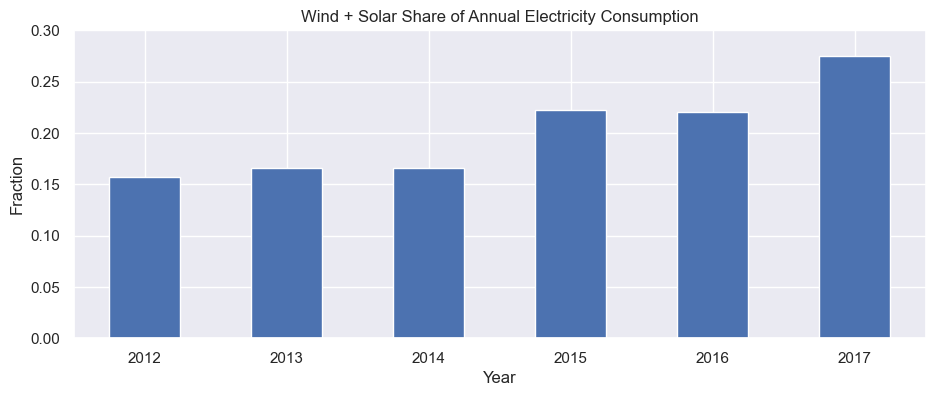

In [53]:
ax = opsd_annual.loc[2012: , "Wind+Solar/Consumption"].plot.bar(color='C0')
ax.set_ylabel("Fraction")
ax.set_ylim(0, 0.3)
ax.set_title("Wind + Solar Share of Annual Electricity Consumption")
plt.xticks(rotation=0)

## Rolling windows

In [54]:
opsd_7d = opsd_daily[data_columns].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


## Trends

TypeError: 'locator' must be an instance of matplotlib.ticker.Locator, not a type

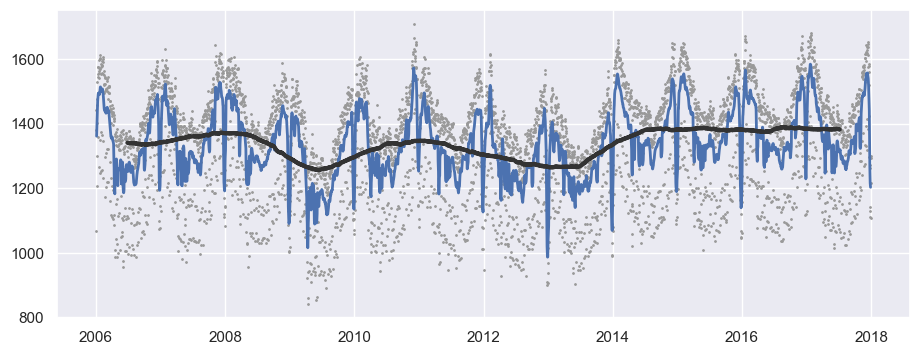

In [57]:
opsd_365d = opsd_daily[data_columns].rolling(window=365, center=True, min_periods=360).mean()

fig, ax = plt.subplots()
ax.plot(opsd_daily['Consumption'], marker='.', markersize=2, color='0.6', linestyle='None', label='Daily')
ax.plot(opsd_7d['Consumption'], linewidth=2, label='7-d Rolling Mean')
ax.plot(opsd_365d['Consumption'], color='0.2', linewidth=3, label='Trend (365-d Rolling Mean)')

ax.xaxis.set_major_locator(mdates.YearLocator)
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Consumption (GWh)")
ax.set_title("Trend in Electricity Consumption")
plt.show()

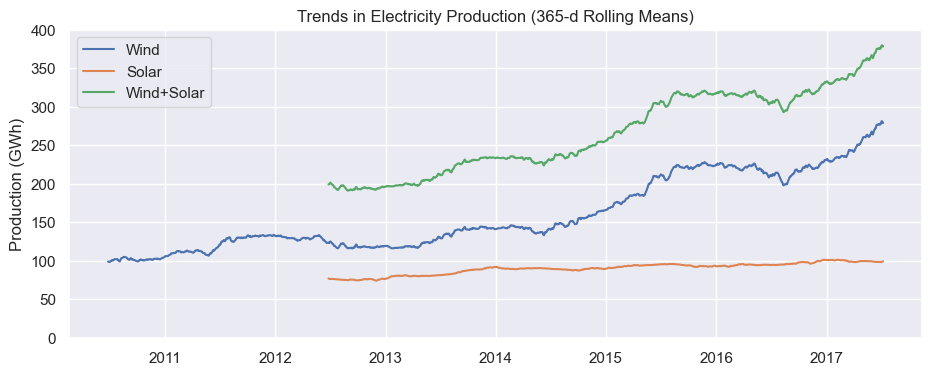

In [58]:
fig, ax = plt.subplots()
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    ax.plot(opsd_365d[nm], label=nm)

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Production (GWh)')
    ax.set_title('Trends in Electricity Production (365-d Rolling Means)')
plt.show()